# MP06 : Optimization Lecture
## Pratical session 1
----
### Conic Cantilever Beam
---

Learning objective of this practical session :
* Formulate a "simple" optimization problem from an analytical model.
* Represent this optimization problem graphically to understand it and identify the optimal solution.
* Solve this problem with a numerical algorithm

### Presentation of the analytical model :

We consider this simple example, a conic cantilever beam, loaded by $\vec{F}$ at the point $A$ of the beam. We will beam theory to determine the analytical expression of the maximal normal stress and the displacement at the end of the beam.

<img src="fig-poutre-console.svg" width="50%"/>

The cross section $S(x)$ and the inertia moment $I(x)$ of this section depend on $x$ and we have :

$$S(x) = \frac{\pi}{4}d(x)^2 \quad I(x) = \frac{\pi}{64}d(x)^4$$
with :
$$d(x) = \left(\frac{d_1 - d_0}{l}\right) x + d_0$$

The bending moment along this beam is :
$$M_{fz}(x)=F(l-x)$$

The normal stress is :
$$\sigma_x(x) = \frac{M_{fz}(x)d(x)}{2I(x)}=\frac{32F(l-x)}{\pi d(x)^3}$$

The maximal normal stress is defined by :
$$\frac{\mathrm{d}\sigma_x(x_0)}{\mathrm{d}x}=0 \Rightarrow x_0=\frac{ld_0 + 3l(d_1-d_0)}{2(d_1-d_0)}=\frac{ld_0}{2(d_1 - d_0)}+\frac{3l}{2}$$

We must have $x_0\in[0,l]$, so we must respect the two conditions :
$$d_0\geq d_1\text{ et }d_0\leq 2d_1$$

So the maximal normal stress is :
$$\sigma_{Max} = \frac{128Fl}{27\pi(d_0-d_1)d_1^2}$$

The elastic potential energy in the beam is :
$$U = \int_0^l\frac{\left(M_{fz(x)}\right)^2}{2EI(x)}\mathrm{d}x$$


$$U = \int_0^l\frac{\left(F(l-x)\right)^2}{2EI(x)}\mathrm{d}x = \frac{64F^2l^3}{6\pi Ed_1d_0^3}$$


By derivating this energy with respect the load $\vec{F}$ at the end of the beam $A$, we can calculate the displacement due to $\vec{F}$ :

$$\frac{\partial U}{\partial F} = \frac{64Fl^3}{3\pi Ed_1d_0^3} = \lambda_A$$

Now we can set the model for this beam :

<img src="fig_modele_final_poutre_console.svg" width="80%"/>

#### 1.1/ Determine the variables, the constraint function of this problem :

Answer ...


#### 1.2/ Give the expression of the optimization problem to minimize the mass (volume) of the beam :

Answer ...

#### 1.3/ Graphical representation of the problem :

Text(55, 32, 'zone 6')

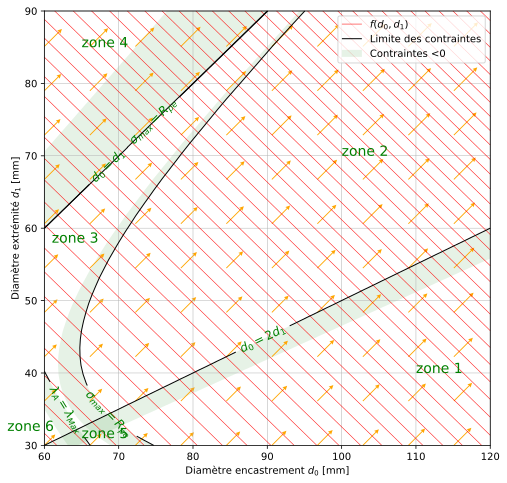

In [5]:
# Importe la librairie de calcul scientifique
# Docs exemples et tutos : https://numpy.org
#
# Rq : cette librairie est importée avec le nom "np" dans ce code.
# On respecte ici les standards et bonnes pratiques de programmation
# en python -> https://realpython.com/tutorials/best-practices/

import numpy as np
# Importe la librairie graphique pour tracer des courbes
# Même remarque pour le nom.
# Doc exemples et tutos : https://matplotlib.org
#
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%config InlineBackend.figure_format = 'svg'


# Données du problème :
poutre_data = {'l'      :200,       # Longueur en [mm]
               'Rpe'    :100,       # Limite elastique [MPa]
               'F'      :1000,      # Charge en [N]
               'E'      :2e5,       # Module d'Young [MPa]
               'u_max':1}           # Fleche maxi a l'extremité [mm]
l = 2000.0
Rpe = 60.0
F = 800.0
E = 2.0e5
u_max = 25


# "Fonctions" critère et contraintes :
def poutre_obj(x):
    # Volume de la poutre et fleche à l'extremité
    d0 = x[0]
    d1 = x[1]
    Volume = np.pi/12*(d0**2 + 2*d0*d1 + d1**2)
    return Volume

def poutre_cnt(x):
    d0 = x[0]
    d1 = x[1]
    # Contrainte maximale 
    SigMax = (128*F*l)/(27*np.pi*(d0-d1)*d1**2)
    # Deplacement en bout de poutre :
    Fleche = (64*F*l**3)/(3*np.pi*E*d1*d0**3)
    # Contraintes :
    Cnt = np.array([SigMax/Rpe - 1,
                    Fleche/u_max - 1,
                    1 - d0/d1,
                    d0/d1 - 2])
    return  Cnt


# Nom des fonctions contraintes
label_cnt = [r'$\sigma_{max}=R_{pe}$',
             r'$\lambda_A=\lambda_{Max}$',
             r'$d_0=d_1$',r'$d_0=2d_1$']
# Label des axes :
label_var = [r'Diamètre encastrement $d_0$ [mm]',
             r'Diamètre extrémité $d_1$ [mm]']  

# Calcul de l'ensemble des fonctions du problème :
# sur une "grille" de 50 x 50 pts 
# 1 fonction critère à minimiser
Ncnt = 4 # 4 fonctions contraintes
Npts = 50 # Nombre de points de calculs suivant d0 et d1 :

d0 = np.linspace(60, 120, Npts)
d1 = np.linspace(30,  90, Npts)
D0,D1 = np.meshgrid(d0, d1)

Fobj = poutre_obj(np.vstack([D0.ravel(), D1.ravel()])).reshape((Npts,Npts))
Fcnt = poutre_cnt(np.vstack([D0.ravel(), D1.ravel()])).reshape((Ncnt,Npts,Npts))  


# Tracé du graphique :
# Initialisation d'une figure vide :
fig =plt.figure(figsize=(8,8)) # figure de taille 8x8 inches.
ax = fig.add_subplot();
# Nom des axes :
ax.set_xlabel(label_var[0])
ax.set_ylabel(label_var[1])
# Tracé des contours de la fonction critère 
cobj=ax.contour(D0,D1,Fobj,50,colors='r',linewidths=0.5)
hobj,_= cobj.legend_elements()
# Tracé des contours de des fonctions contraintes :
for i in range(Ncnt):
    csb=ax.contour( D0, D1, Fcnt[i,:,:],0,colors='k',linewidths=1)
    csd=ax.contourf( D0, D1, Fcnt[i,:,:],[0,0.15],alpha=0.1,colors='g')
    hcsb,_= csb.legend_elements()
    hcsd,_= csd.legend_elements()
    ax.clabel(csb,inline=True,fmt=label_cnt[i],fontsize=12,colors='g')
# Calcul du gradient de la fonction critère :
V,U = np.gradient(Fobj)
dn = 5
ax.quiver(D0[0:-1:dn,0:-1:dn],D1[0:-1:dn,0:-1:dn],
                U[0:-1:dn,0:-1:dn],V[0:-1:dn,0:-1:dn],
                color='orange',linewidth=0,width=0.002,headwidth=5,label='f')
plt.grid(linewidth=0.5)
plt.legend([hobj[0],hcsb[1],hcsd[0]],[r'$f(d_0,d_1)$','Limite des contraintes','Contraintes <0'])
plt.text(110,40,'zone 1',fontsize=14,color='g')
plt.text(100,70,'zone 2',fontsize=14,color='g')
plt.text(61,58,'zone 3',fontsize=14,color='g')
plt.text(65,85,'zone 4',fontsize=14,color='g')
plt.text(65,31,'zone 5',fontsize=14,color='g')
plt.text(55,32,'zone 6',fontsize=14,color='g')

#### 1.4/ Using an optimization algorithm to solve the problem :

In [14]:
# Importe les fonctions d'optimisation de la librairie
# scipy -> https://www.scipy.org
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
from scipy.optimize import Bounds

# Fonction pour stocker les infos des itérations de l'algorithme
# d'optimisation.
def reporter(p,opt_res):

    global ps,fs,cs
    ps.append(p)
    fs.append(opt_res.fun)
    cs.append(opt_res.constr_violation)
    return

# Bornes de l'espace de recherche de la solution
# i.e bornes du graphique de l'espace de conception.
poutre_bounds = Bounds([60,30],
                       [120,90])

# Contraintes du problème d'optimisation :
#ineq_cons = {'type': 'ineq',
#             'fun' : lambda x: -poutre_cnt(x)}

nonlinear_constraint = NonlinearConstraint(poutre_cnt,-np.inf,0)
# Point de départ choisi arbritrairement.
# En général l'un des "coins" ou le "milieu"
# définis par les bornes.
x0 = np.array([120,40])
ps = [x0]
fs = [0]
cs = [0] 
#
# Lance les calculs d'optimisation
# ici on utilise la méthode "trust-constraint"
# cf doc de scipy pour plus détails
res = minimize(poutre_obj, x0,
               method='trust-constr',
               constraints=[nonlinear_constraint],
               options={'disp':1,'verbose':3},
               bounds=poutre_bounds,
               callback=reporter)

# Affiche la solution :
print('\n\nSolution optimale :\nd0=%6.2fmm d1=%6.2fmm'%(res.x[0],res.x[1]))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   3   |   0   | +6.7021e+03 | 1.00e+00 | 8.29e+01 | 1.00e+00 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |   6   |   1   | +6.6237e+03 | 7.00e+00 | 8.09e+01 | 1.03e+00 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |   9   |   2   | +6.1290e+03 | 3.43e+01 | 8.85e+01 | 1.28e+00 | 1.00e+00 |  1.00e-01   |   2   |
|   4   |  12   |   3   | +3.8093e+03 | 2.40e+02 | 7.56e+01 | 3.21e-01 | 1.00e+00 |  1.00e-01   |   2   |
|   5   |  15   |   4   | +2.4056e+03 | 2.40e+02 | 1.46e-01 | 2.34e-01 | 1.00e+00 |  1.00e-01   |   4   |
|   6   |  18   |   5   | +2.7177e+03 | 2.40e+02 | 3.98e-04 | 2.73e-02 | 1.21e+03 |  1.00e-01   |   4   |
|   7   |  18   |   5   | +2.7177e+03 | 1.20e+03 | 7.50e-05 | 2.73e-02 | 1.00e+00 |  2.00e-02   |   0   |
|   8   |  21   |   7   | +2.7660e+03 | 1.20e+

#### Plotting the iterations of the optimization algorithm :

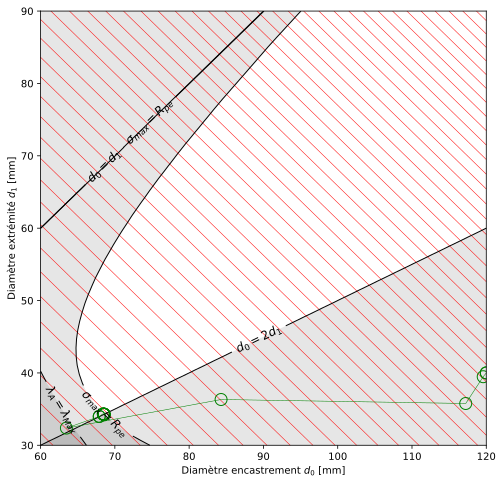

In [16]:
# Trace le "trajet" de l'agorithme d'optimisation :
fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot();
ax.set_xlabel(label_var[0])
ax.set_ylabel(label_var[1])

ax.contour(D0,D1,Fobj*1e3,50,colors='r',linewidths=0.5)

ps = np.array(ps)

for i in range(Ncnt):
    CS=ax.contour( D0, D1, Fcnt[i,:,:],0,colors='k',linewidths=1)
    ax.clabel(CS,inline=True,fmt=label_cnt[i],fontsize=12)
    ax.contourf(D0, D1, Fcnt[i,:,:],[0,np.inf],colors='k',alpha=0.1)

plt.plot(ps[:, 0], ps[:, 1],color='g',
             linewidth=0.5,
             marker='o',
            markersize=12,
             markeredgecolor='g',
            markerfacecolor='none')    
    
#for i in range(0,len(ps)):
#    plt.plot(ps[1:i, 0], ps[1:i, 1],color='g',
#             linewidth=0.5,
#             marker='o',
#             markersize=12,
#             markeredgecolor='g',
#             markerfacecolor='none')